In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from kneed import KneeLocator

In [2]:
data = pd.read_csv("data/ExportBales_1.csv", sep=";")
data

,_time,bale_info_bale_length,bale_info_bale_weight,bale_info_flake_count,bale_info_moisture,bale_info_tag_#,latitude,longitude,Colonne1,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2021-07-31T08:09:17Z,3200,211000,255,110000,1,52.115374,11.078973,1,NaN,NaN,NaN,NaN
1,2021-07-31T08:10:13Z,1960,361000,44,110000,2,52.115187,11.082384,1,NaN,NaN,NaN,NaN
2,2021-07-31T08:11:02Z,2440,445000,40,110000,3,52.115149,11.080707,1,NaN,NaN,NaN,NaN
3,2021-07-31T08:12:04Z,2410,430000,39,110000,4,52.115188,11.079040,1,NaN,NaN,NaN,NaN
4,2021-07-31T08:12:50Z,2430,454000,38,110000,5,52.115411,11.079829,1,NaN,NaN,NaN,NaN
5,2021-07-31T08:23:23Z,2460,402000,29,110000,7,52.115257,11.079463,1,NaN,NaN,NaN,NaN
6,2021-07-31T08:24:14Z,2420,434000,36,110000,8,52.115479,11.079626,1,NaN,NaN,NaN,NaN
7,2021-07-31T08:25:32Z,2440,431000,40,110000,9,52.115429,11.081506,1,NaN,NaN,NaN,NaN
8,2021-07-31T09:38:19Z,2430,421000,33,110000,11,52.115068,11.080748,1,NaN,NaN,NaN,NaN
9,2021-07-31T09:41:43Z,2420,450000,48,110000,12,52.115085,11.079170,1,NaN,NaN,NaN,NaN


In [3]:
data["Colonne1"].unique()

array([1])

In [4]:
data.drop(inplace=True, columns=data.columns[-5:])
data

,_time,bale_info_bale_length,bale_info_bale_weight,bale_info_flake_count,bale_info_moisture,bale_info_tag_#,latitude,longitude
0,2021-07-31T08:09:17Z,3200,211000,255,110000,1,52.115374,11.078973
1,2021-07-31T08:10:13Z,1960,361000,44,110000,2,52.115187,11.082384
2,2021-07-31T08:11:02Z,2440,445000,40,110000,3,52.115149,11.080707
3,2021-07-31T08:12:04Z,2410,430000,39,110000,4,52.115188,11.079040
4,2021-07-31T08:12:50Z,2430,454000,38,110000,5,52.115411,11.079829
5,2021-07-31T08:23:23Z,2460,402000,29,110000,7,52.115257,11.079463
6,2021-07-31T08:24:14Z,2420,434000,36,110000,8,52.115479,11.079626
7,2021-07-31T08:25:32Z,2440,431000,40,110000,9,52.115429,11.081506
8,2021-07-31T09:38:19Z,2430,421000,33,110000,11,52.115068,11.080748
9,2021-07-31T09:41:43Z,2420,450000,48,110000,12,52.115085,11.079170


In [5]:
# Calcul le nombre de cluster 

In [6]:
X = data.loc[:,["latitude", "longitude"]]
X

,latitude,longitude
0,52.115374,11.078973
1,52.115187,11.082384
2,52.115149,11.080707
3,52.115188,11.079040
4,52.115411,11.079829
5,52.115257,11.079463
6,52.115479,11.079626
7,52.115429,11.081506
8,52.115068,11.080748
9,52.115085,11.079170


1 8.504449382276284e-05
2 2.0673697553332797e-05
3 7.64430395179505e-06
4 4.3960349503653514e-06
5 3.2093807995323907e-06
6 2.0624204778575726e-06
7 1.4725294391667635e-06
8 1.0011594291645124e-06
9 6.525070116667093e-07
10 3.6554503000054947e-07
11 2.3228748166712142e-07
12 1.6225333999984283e-07
13 9.418781500000925e-08
14 4.5036219999818786e-08
Elbow : 3


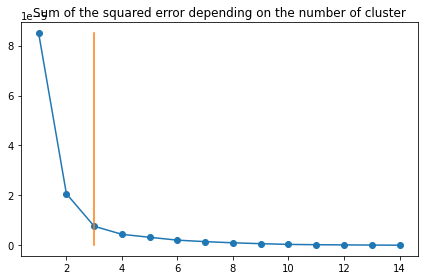

In [7]:
# Elbow method
max_clust = 15

sse = []
for k in range(1, max_clust):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, tol=0.0001, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    print(k, kmeans.inertia_, flush=True)
    
plt.plot(range(1,max_clust), sse, marker="o")
plt.title("Sum of the squared error depending on the number of cluster")

kl = KneeLocator(range(1,max_clust), sse, curve="convex", direction="decreasing")
elbow = kl.elbow
print("Elbow :", elbow)

plt.plot([elbow, elbow], [np.min(sse), np.max(sse)])
plt.tight_layout()
plt.show()

In [8]:
# relancer kmeans avec le meilleur nombre de clusters 
kmeans = KMeans(n_clusters=elbow, n_init=10, max_iter=300, tol=0.0001, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [9]:
# Final locations of the centroid
centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=X.columns)
centers

,latitude,longitude
0,52.115384,11.079304
1,52.115864,11.084782
2,52.115504,11.081612


In [10]:
kmeans.labels_

array([0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1], dtype=int32)

In [15]:
colors[:elbow]

['indianred', 'sandybrown', 'gold']

['indianred', 'gold', 'gold', 'indianred', 'indianred', 'indianred', 'indianred', 'gold', 'gold', 'indianred', 'gold', 'indianred', 'gold', 'sandybrown', 'sandybrown', 'sandybrown', 'gold', 'sandybrown']


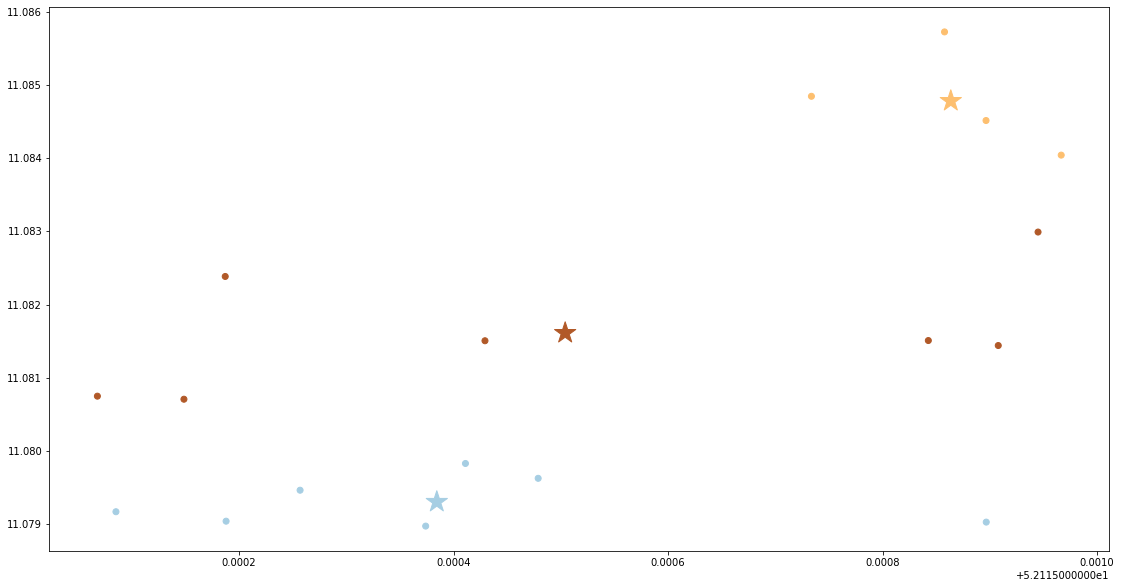

In [34]:
# Plot des données et des centres 
colors = ["indianred", "sandybrown", "gold", "darkseagreen", "paleturquoise", "lightskyblue", "plum", "pink"] 
labels = kmeans.labels_
colors_pt = [colors[labels[idx]] for idx in X.index]
print(colors_pt)

plt.figure(figsize=(19,10))
plt.scatter(X["latitude"], X["longitude"], c=labels, cmap="Paired")
plt.scatter(centers["latitude"], centers["longitude"], marker="*", c=list(centers.index), s=500, cmap="Paired")
plt.show()

In [35]:
X["cluster"] = labels
X

,latitude,longitude,cluster
0,52.115374,11.078973,0
1,52.115187,11.082384,2
2,52.115149,11.080707,2
3,52.115188,11.079040,0
4,52.115411,11.079829,0
5,52.115257,11.079463,0
6,52.115479,11.079626,0
7,52.115429,11.081506,2
8,52.115068,11.080748,2
9,52.115085,11.079170,0


In [36]:
X.to_csv("data/ExportBales_1_cluster.csv")